In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [53]:
with open("output.json", "r") as f:
    data = json.load(f)
len(data)

250

In [54]:
# Flatten data for DataFrame
flattened_data = []
for entry in data:
    flat = {
        "input_dim": entry["config"]["model"]["input_dim"],
        "output_dim": entry["config"]["model"]["output_dim"],
        "hidden_dim": entry["config"]["model"]["hidden_dim"],
        "num_layers": entry["config"]["model"]["num_layers"],
        "batch_size": entry["config"]["batch_size"],
        "expect_param_count": entry["config"]["expect_param_count"],
        "time": entry["time"],
        "energy": entry["energy"]
    }
    flattened_data.append(flat)

df = pd.DataFrame(flattened_data)

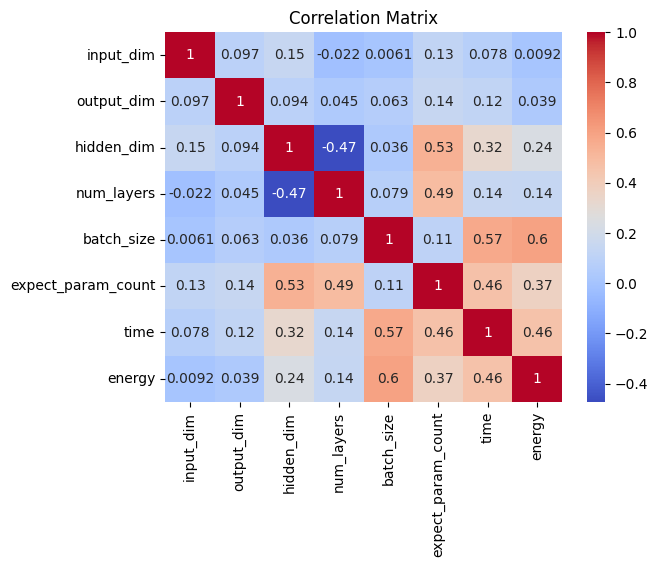

In [55]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

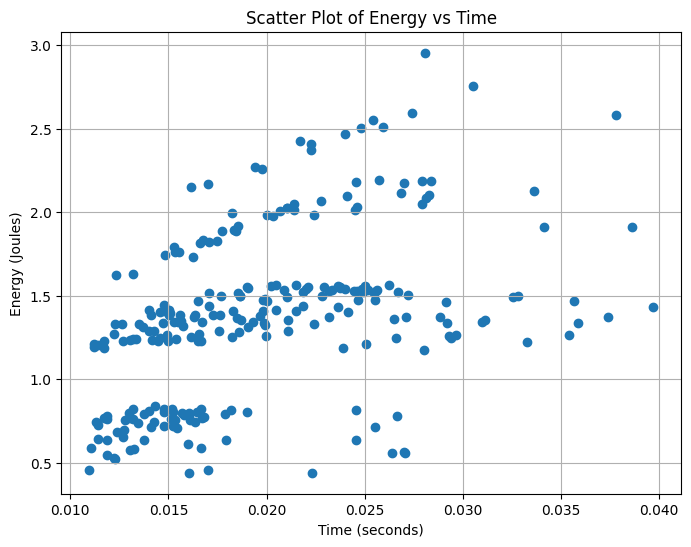

In [56]:
# Scatter plot of energy vs time
plt.figure(figsize=(8, 6))
plt.scatter(df["time"], df["energy"])
plt.xlabel("Time (seconds)")
plt.ylabel("Energy (Joules)")
plt.title("Scatter Plot of Energy vs Time")
plt.grid(True)
plt.show()


In [57]:
from sklearn.linear_model import LinearRegression

# Define feature matrix X and targets y_time and y_energy
features = ["input_dim", "output_dim", "hidden_dim", "num_layers", "batch_size"]
X = df[features]
y_time = df["time"]
y_energy = df["energy"]

# Fit linear regression models
model_time = LinearRegression().fit(X, y_time)
model_energy = LinearRegression().fit(X, y_energy)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_time_pred = model_time.predict(X)
y_energy_pred = model_energy.predict(X)

# Evaluation metrics
metrics = {
    "R2_time": r2_score(y_time, y_time_pred),
    "MSE_time": mean_squared_error(y_time, y_time_pred),
    "R2_energy": r2_score(y_energy, y_energy_pred),
    "MSE_energy": mean_squared_error(y_energy, y_energy_pred)
}

metrics_df = pd.DataFrame([metrics])
metrics_df

,R2_time,MSE_time,R2_energy,MSE_energy
0,0.493661,0.000019,0.461964,0.138528


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# Split data into training and test sets
X_train, X_test, y_time_train, y_time_test, y_energy_train, y_energy_test = train_test_split(
    X, y_time, y_energy, test_size=0.4, random_state=42
)

# Train Gradient Boosting models
gb_model_time = GradientBoostingRegressor().fit(X_train, y_time_train)
gb_model_energy = GradientBoostingRegressor().fit(X_train, y_energy_train)

# Predictions on test set
y_time_test_pred = gb_model_time.predict(X_test)
y_energy_test_pred = gb_model_energy.predict(X_test)
# Predictions on training set
y_time_train_pred = gb_model_time.predict(X_train)
y_energy_train_pred = gb_model_energy.predict(X_train)

# Evaluation metrics on training set
train_metrics = {
    "R2_time": r2_score(y_time_train, y_time_train_pred),
    "MSE_time": mean_squared_error(y_time_train, y_time_train_pred),
    "R2_energy": r2_score(y_energy_train, y_energy_train_pred),
    "MSE_energy": mean_squared_error(y_energy_train, y_energy_train_pred)
}

# Evaluation metrics on test set
test_metrics = {
    "R2_time": r2_score(y_time_test, y_time_test_pred),
    "MSE_time": mean_squared_error(y_time_test, y_time_test_pred),
    "R2_energy": r2_score(y_energy_test, y_energy_test_pred),
    "MSE_energy": mean_squared_error(y_energy_test, y_energy_test_pred)
}

test_metrics_df = pd.DataFrame([train_metrics, test_metrics])
test_metrics_df


,R2_time,MSE_time,R2_energy,MSE_energy
0,0.969211,0.000001,0.959910,0.011065
1,0.337471,0.000024,0.375323,0.137646
